In [1]:
import torch
import numpy as np
import torch.nn as nn
import copy
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from lovely_numpy import lo
import scipy
import json
import cv2

/datagrid/personal/baljibil/repos/env-vitpose/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
ROOT_FOLDER = "/datagrid/personal/baljibil"
# ground truth
with open(ROOT_FOLDER + '/repos/scripts/data/mpii_pred_on_coco_resnet.json', 'r') as f:
    annot_pred_mpii = json.load(f)
# prediction
with open(ROOT_FOLDER + '/data/COCO/original/annotations/person_keypoints_val2017.json', 'r') as f:
    annot_truth = json.load(f)
    
with open(ROOT_FOLDER + '/repos/ViTPose/work_dirs/vitPose+_base_coco+aic+mpii+ap10k+apt36k+wholebody_256x192_udp/result_keypoints.json', 'r') as f:
    annot_hacked_mpii = json.load(f)

[137.71115112304688, 1.20635986328125, 0.8589409589767456, 140.23574829101562, -0.41619873046875, 0.8359238505363464, 139.65261840820312, -0.076690673828125, 0.7209398746490479, 271.69976806640625, 216.8472900390625, 0.8144600987434387, 341.71795654296875, -1.45733642578125, 0.8695828914642334, 343.7420654296875, 0.3346405029296875, 0.8207667469978333, 243.19476318359375, 215.85333251953125, 0.8245539665222168, 138.90545654296875, -0.1233673095703125, 1.162855625152588, 138.56692504882812, 0.6262664794921875, 1.1423463821411133, 342.2839660644531, 0.2635345458984375, 0.8935040235519409, 227.88723754882812, 137.80197143554688, 0.9593337178230286, 164.3404541015625, 139.20462036132812, 0.9502583742141724, 183.15679931640625, 75.92544555664062, 0.9387704133987427, 301.4500732421875, 84.46389770507812, 0.9524565935134888, 316.8503112792969, 141.3724365234375, 0.9308552145957947, 296.764404296875, 157.29791259765625, 0.9338889718055725]
48


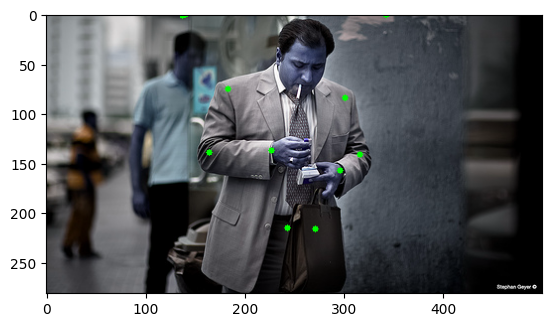

In [38]:
instance = annot_hacked_mpii[572]
print(instance['keypoints'])
print(len(instance['keypoints']))
image = cv2.imread(ROOT_FOLDER + '/data/COCO/original/val2017/' + "000000" + f"{instance['image_id']}.jpg")

for i in range(0,len(instance['keypoints']), 3):
  kp = instance['keypoints']
  x, y = int(kp[i]), int(kp[i+1])
  cv2.circle(image, (x, y), 3, (0, 255, 0, 150), -1)
plt.imshow(image)